<a href="https://colab.research.google.com/github/okcy58/AI2022/blob/main/Numpy_%EA%B3%A0%EA%B8%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. ndarray 객체 내부 알아보기
- a means to interpret a block of homogeneou sdata as a multidimensional array object(다양한 형태의 데이터를 다차원 배열 객체로 해석하는 방법 제공)
- 데이터 블록에 대한 부분적인 view를 제공
- a *pointer to data* is a block of system memory(데이터에 대한 포인터)
- the *data type* or dtype
- a tuple indicating the array's *shape*
- a tuple of *strides*, integers indicating the # of bytes to "step" in order to advance one element along a dimension
![그림12-1](img/p354.png)

In [ ]:
import numpy as np

In [ ]:
np.ones((10,5)).shape

- stride: 하나의 원소에서 다음 원소까지의 너비를 표현
- 3x4x5 크기의 float64(8bytes) 배열의 stride (160,40,8)
    - 4x5 x 8 = 160
    - 5 x 8 = 40
    - 8

In [ ]:
np.ones((3,4,5),dtype=np.float64).strides

### NumPy dtype Hierarchy
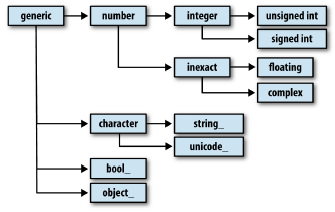

In [ ]:
ints = np.ones(10,dtype=np.uint16)
np.issubdtype(ints.dtype, np.integer)

In [ ]:
floats = np.ones(10,dtype=np.float32)
np.issubdtype(floats.dtype, np.floating)

In [ ]:
np.float64.mro()  # mro: 특정 dytpe의 모든 부모 class 목록

## 2. 고급 Array 조작

### 2.1 Reshaping

In [ ]:
arr = np.arange(8)
arr

In [ ]:
arr.reshape((4,2))

In [ ]:
arr.reshape((4,2)).reshape((2,4))

- reshape의 값이 -1이면 워논데이터를 참조해서 적절한 값을 추론

In [ ]:
arr = np.arange(15)
arr.reshape((5,-1))

- *flattening or raveling*: the opposite operation of **reshape**
- **ravel** : 복사본을 생성하지 않음
- **flatten**: 복사본을 반환

In [ ]:
arr.ravel()

In [ ]:
arr.flatten()

### 2.2 C vs. Fortran Order
- C Order : row major order
- Fortran : column major order
![Fig12-3](img/p358.png)

In [ ]:
arr = np.arange(12).reshape((3,4))
arr

In [ ]:
arr.ravel()   # Raw major 평탄화

In [ ]:
arr.ravel('F')   # Fortran 순서(column major) 평탄화

### 2.3 Concatenating and Splitting Arrays
- **concatenate** : 입력 axis 기준에 따라 array를 join
- **split** : 입력 axis 기준에 따라 배열을 여러 배열로 쪼깸(split)

In [ ]:
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[7,8,9],[10,11,12]])

In [ ]:
np.concatenate([arr1,arr2], axis=0)  # vstack((arr1,arr2)), row_stack

In [ ]:
np.vstack((arr1,arr2))

In [ ]:
np.row_stack((arr1,arr2))

In [ ]:
np.concatenate([arr1,arr2], axis=1) # hstack((arr1,arr2)), column_stack

In [ ]:
np.hstack((arr1,arr2))

In [ ]:
np.column_stack((arr1,arr2))

In [ ]:
arr = np.arange(10).reshape((5,2))
arr

In [ ]:
first, second, third = np.split(arr,[1,3])   # 1, 3 열을 기준으로 split
print(first)
print(second)
print(third)

- hsplit, vsplit, dsplit : 각각 axis 0, 1, 2를 따라 배열을 쪼갬

In [ ]:
first, second = np.hsplit(arr,[1])
print(first)
print(second)

In [ ]:
first, second, third = np.vsplit(arr,[1,3])   # 1, 3 열을 기준으로 split
print(first)
print(second)
print(third)

#### 배열 쌓기 도우미: r_, c_

In [ ]:
from numpy.random import randn
arr = np.arange(6)
arr1 = arr.reshape((3,2))
arr2 = randn(3,2)

In [ ]:
np.r_[arr1,arr2]

In [ ]:
np.c_[np.r_[arr1,arr2],arr]

In [ ]:
np.c_[1:6, -10:-5]

### 2.4 원소반복시키기: repeat, tile
- repeat: 한 배열의 각 원소를 원하는 만큼 복제

In [ ]:
arr = np.arange(3)
print(arr)
arr.repeat(3)

In [ ]:
# 배열을 넘기면 각 원소를 배얄의 정수만큼 반복
arr.repeat([2,3,4])

In [ ]:
arr1 = randn(2,2)
arr1

In [ ]:
arr1.repeat(2)   # axis가 없으면 단순 평탄화

In [ ]:
arr1.repeat(2, axis=0)

In [ ]:
arr1.repeat([2,3], axis=0)

In [ ]:
arr1.repeat(2,axis=1)

- tile: 축을 따라 배열을 복사해서 쌓음. 같은 내용의 배열을 이어붙임

In [ ]:
np.tile(arr1, 2)

In [ ]:
np.tile(arr1, (2,1))

In [ ]:
np.tile(arr1, (3,2))

## 3. Broadcasting
- Broadcating: 다른 모양의 배열간 산술연산을 설명.
- http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc

In [ ]:
# 배열과 scalar 값의 결합
arr = np.arange(5)
print(arr)
arr*4

- broadcasting over axis 0 with a 1D array

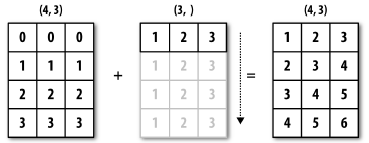

In [ ]:
arr = randn(4,3)
arr

In [ ]:
arr.mean(0)

In [ ]:
demeaned = arr - arr.mean(0)
demeaned

In [ ]:
demeaned.mean(0)

- broadcasting over axis 1 with a 2D array

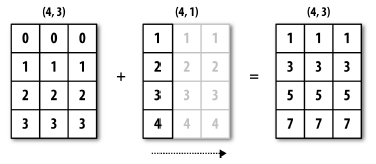

In [ ]:
arr

In [ ]:
row_means = arr.mean(1)
print(row_means)
row_means.reshape((4,1))

In [ ]:
demeaned = arr - row_means.reshape((4,1))
demeaned

In [ ]:
demeaned.mean(1)

- broadcasting over axis 0 with a 3D array

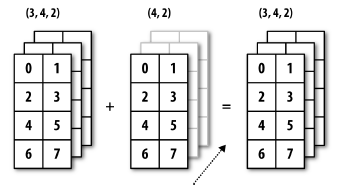

### 3.1 다른 축에 대해 broadcasting
- np.newaxis: broadcasting을 위해 길이가 1인 새로운 축을 추가

In [ ]:
arr = np.zeros((4,4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape

In [ ]:
arr_1d = np.random.normal(size=3)
arr_1d[:,np.newaxis]

In [ ]:
arr_1d[np.newaxis, :]

- Compatible 2D array shapes for broadcasting over a 3D array

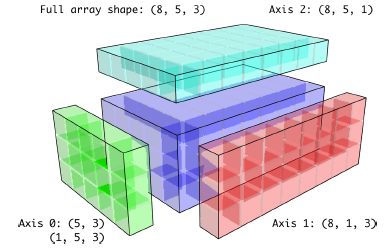

In [ ]:
# 3 차원 배열에서 2번 축에 대해 평균 값 빼기
arr = randn(3,4,5)
arr

In [ ]:
depth_mean = arr.mean(2)
depth_mean

In [ ]:
demeaned = arr - depth_mean[:,:,np.newaxis]
demeaned

### 3.2 Broadcasting을 이용해 배열에 값 대입하기
- 배열의 색인을 이용한 값 대입 시 브로드캐스틴 규칙이 적용
- 배열의 모양이 호환되는 한 1차원 배열을 그 배열의 column의 값으로 대입할 수 있음

In [1]:
arr = np.zeros((4,3))
arr[:]= 5
arr

NameError: ignored

In [ ]:
col = np.array([1.28, -0.42, 0.44, 1.6])
arr[:] = col[:, np.newaxis]
arr

In [ ]:
arr[:2] = [[-1.37],[0.509]]
arr

## 4. 고급 ufunc 사용법
method | 설명
-----|-----
reduce(x)| 연산의 연속된 적용으로 값을 집계한다.
accumulate(x)| 모든 부분적 집계 값을 유지한 채 값을 집계한다.
reduceat(x, bins)| 로컬 reduce 또는 groupby. 
|연속된 데이터 슬라이스를 집계된 배열로 축소
outer(x, y)| x와 y의 모든 원소 조합에 대해 연산을 적용. 
|결과 배열은 x.shape+y.shape의 형태를 가짐


In [ ]:
arr = np.arange(10)
np.add.reduce(arr)

In [ ]:
arr = np.arange(15).reshape((3,5))
arr

In [ ]:
np.add.accumulate(arr, axis=1)

In [ ]:
np.add.accumulate(arr, axis=0)

## 5. Learning SciPy
- SciPy offers a magnitude of algorithms working on Numpy arrays
- the complete namespace of NumPy is also accessible via SciPy.
- https://docs.scipy.org/doc/scipy/reference/

In [ ]:
import scipy, numpy
scipy.version.full_version

In [ ]:
scipy.dot is numpy.dot

package | Functionalities
-----|------ 
cluster | - Hierachical clustering(cluster.hierarchy)
|- Vector quantization/K-means(cluster.vq)
constants | - Physical and mathmatical constants
| - Conversion methods
fftpack | Discrete Fourier transform algorithm
integrate | Intergration routines
interpolate | Interpolation(linear, cubic, and so on)
io | Data input and output
linalg | Linear algebra routines using the optimize BLAS and LAPACK libraries
ndimage | n-dimensional image package
odr | Orthogonal distance regression
optimize | Optimization (finding minima and roots)
signal | Signal processing
sparse | Sparse matrices
spatial | Spatial data structures and algorithms
special | Special mathmatical functions a.a Bessel or Jacobian
stats | Statistics toolkit

## 6. Learning Scikit-learn

http://scikit-learn.org/stable/index.html